In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load_Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Date_CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_SE = df[df['job_title_short']=='Software Engineer'].copy() 

In [3]:
df_SE['job_posted_month_no'] = df_SE['job_posted_date'].dt.month

df_SE

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
69,Software Engineer,Software Engineer in Data Warehouse,"Tallinn, Estonia",via LinkedIn Estonia,Full-time,False,Estonia,2023-01-17 13:36:23,False,False,Estonia,None,NaN,NaN,Swedbank,[sql],{'programming': ['sql']},1
72,Software Engineer,Performance Analyst,"Budapest, Hungary",via LinkedIn Hungary,Full-time,False,Hungary,2023-05-16 13:25:17,True,False,Hungary,None,NaN,NaN,Diageo,[power bi],{'analyst_tools': ['power bi']},5
83,Software Engineer,Senior DevOps Engineer,Egypt (+1 other),via Levels.fyi,Full-time,False,Egypt,2023-11-01 13:13:36,False,False,Egypt,None,NaN,NaN,2U,"[bash, python, aws, linux, splunk, github, jen...","{'analyst_tools': ['splunk'], 'cloud': ['aws']...",11
104,Software Engineer,Senior Software Engineer - Metadata,"Berlin, Germany",via Snowflake Careers,Full-time,False,Germany,2023-10-27 13:13:54,False,False,Germany,None,NaN,NaN,Snowflake,"[c++, java, snowflake]","{'cloud': ['snowflake'], 'programming': ['c++'...",10
184,Software Engineer,Protocol Stack SW Engineer,"Shanghai, China",via Trabajo.org,Full-time,False,China,2023-02-27 13:29:33,False,False,China,None,NaN,NaN,MediaTek,"[c, terminal]","{'other': ['terminal'], 'programming': ['c']}",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}",1
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"[c#, sql]","{'programming': ['c#', 'sql']}",3
785733,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:17,False,False,Singapore,None,NaN,NaN,Hydra X Pte. Ltd.,"[docker, kubernetes]","{'other': ['docker', 'kubernetes']}",3
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete...",3


In [4]:
df_SE_explode = df_SE.explode('job_skills')

In [5]:
df_SE_pivot = df_SE_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

<Axes: xlabel='job_posted_month_no'>

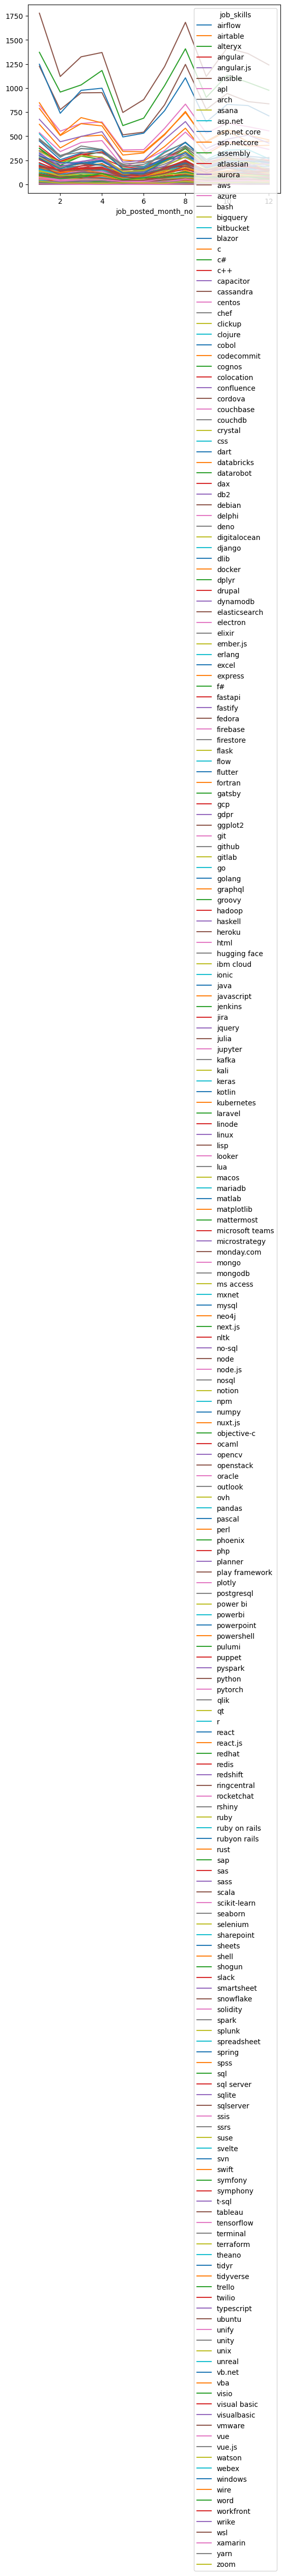

In [6]:
df_SE_pivot.plot()

In [8]:
df_SE_pivot.loc['Total'] = df_SE_pivot.sum()

df_SE_pivot = df_SE_pivot[df_SE_pivot.loc['Total'].sort_values(ascending=False).index]

In [9]:
df_SE_pivot = df_SE_pivot.drop('Total')

In [10]:
df_SE_pivot

job_skills,python,sql,aws,java,azure,kubernetes,docker,linux,javascript,git,...,sqlserver,tidyr,deno,mattermost,dlib,asp.netcore,rubyon rails,rocketchat,shogun,visualbasic
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1777,1371,1226,1247,818,847,788,675,623,537,...,0,1,0,0,0,0,0,1,0,0
2,1120,958,776,738,552,512,506,442,378,340,...,0,0,1,0,0,0,1,0,0,0
3,1324,1032,950,976,632,693,630,497,498,434,...,0,0,1,0,0,0,0,0,0,0
4,1369,1182,952,998,648,638,607,547,510,454,...,0,0,0,1,0,0,0,0,0,0
5,746,610,514,492,357,342,304,230,252,186,...,0,0,0,1,0,0,0,0,0,0
6,880,687,542,531,360,337,326,250,239,246,...,0,0,0,0,1,0,0,0,0,0
7,1222,1024,825,764,581,522,513,466,392,351,...,0,0,0,0,0,0,0,0,0,0
8,1682,1407,1245,1106,833,746,757,652,583,542,...,0,1,0,0,0,1,0,0,0,0
9,1120,903,778,648,531,447,440,371,313,337,...,0,0,0,0,0,0,0,0,0,0


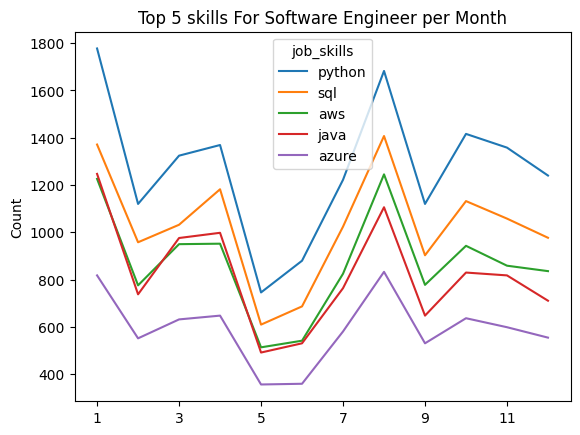

In [11]:
df_SE_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 skills For Software Engineer per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()


<Axes: xlabel='job_posted_month'>

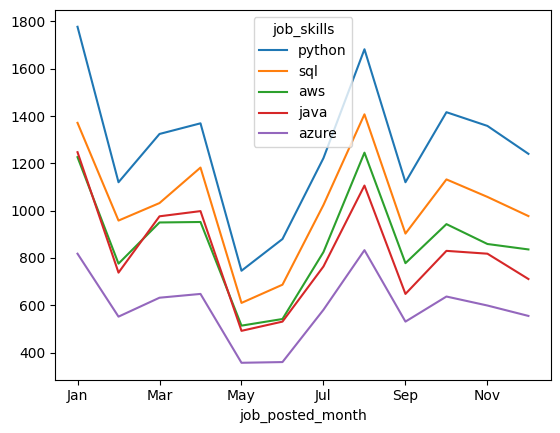

In [12]:
df_SE_pivot = df_SE_pivot.reset_index()
df_SE_pivot['job_posted_month'] = df_SE_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_SE_pivot = df_SE_pivot.set_index('job_posted_month')
df_SE_pivot = df_SE_pivot.drop(columns='job_posted_month_no')

df_SE_pivot.iloc[:, :5].plot(kind='line')

In [47]:
df_SE_pivot

job_skills,job_posted_month,python,sql,aws,java,azure,kubernetes,docker,linux,javascript,...,sqlserver,tidyr,deno,mattermost,dlib,asp.netcore,rubyon rails,rocketchat,shogun,visualbasic
0,Jan,1777,1371,1226,1247,818,847,788,675,623,...,0,1,0,0,0,0,0,1,0,0
1,Feb,1120,958,776,738,552,512,506,442,378,...,0,0,1,0,0,0,1,0,0,0
2,Mar,1324,1032,950,976,632,693,630,497,498,...,0,0,1,0,0,0,0,0,0,0
3,Apr,1369,1182,952,998,648,638,607,547,510,...,0,0,0,1,0,0,0,0,0,0
4,May,746,610,514,492,357,342,304,230,252,...,0,0,0,1,0,0,0,0,0,0
5,Jun,880,687,542,531,360,337,326,250,239,...,0,0,0,0,1,0,0,0,0,0
6,Jul,1222,1024,825,764,581,522,513,466,392,...,0,0,0,0,0,0,0,0,0,0
7,Aug,1682,1407,1245,1106,833,746,757,652,583,...,0,1,0,0,0,1,0,0,0,0
8,Sep,1120,903,778,648,531,447,440,371,313,...,0,0,0,0,0,0,0,0,0,0
9,Oct,1416,1132,943,830,637,567,552,468,435,...,1,0,0,0,0,0,0,0,0,1
